# Module 4 -- Feature Engineering (FE) & EDA Assignment
### APAN5420: Anomaly Detection

# Objective
This dataset will show how the price of the same diagnosis and the same treatment can vary from provider to provider in the same city. I intend to be able to use the analysis to detect fraud between providers.
- Detect any hospital that may abuse the resources.
- Detect any hospital that may abuse the resources compared to its peers.
- Detect any hospital that may abuse the resources compared to the average (median, ratio) of its peers.
- Detect any hospital that may abuse the resources compared to the average (median etc) of its peers of the same DRG and State.
- Detect any hospital that may abuse the resources compared to the average (median etc) of its peers of the same DRG and City.
- Detect any hospital that may abuse the resources on inpatients.

# Feature Engineering (FE)
I will focus on the follwing variables:
- "Average Total Payments", which is the "Total Payments / Total Discharges".
- "Average Covered Charges", which is the "Total Covered Charge Amount / Total Discharges".
- "Ratio of Medicare Payments to Total Payments", which is "Average Medicare Payments / Average Total Payments"
- "Total Discharges"

# About dataset:
- This dataset is owned by the U.S. government. It is available for free on data.gov, and the dataset is updated regularly here.

### Attributes Description:
- DRG Definition: The code and description identifying the MS-DRG. MS-DRGs are a classification system that groups similar clinical conditions (diagnoses) and the procedures furnished by the hospital during the stay.
- Provider Id: The CMS Certification Number (CCN) assigned to the Medicare certified hospital facility.
- Provider Name: The name of the provider.
- Provider Street Address: The provider’s street address.
- Provider City: The city where the provider is located.
- Provider State: The state where the provider is located.
- Provider Zip Code: The provider’s zip code.
- Provider HRR: The Hospital Referral Region (HRR) where the provider is located.
- Total Discharges: The number of discharges billed by the provider for inpatient hospital services.
- Average Covered Charges: The provider's average charge for services covered by Medicare for all discharges in the MS-DRG. These will vary from hospital to hospital because of differences in hospital charge structures.
- Average Total Payments: The average total payments to all providers for the MS-DRG including the MSDRG amount, teaching, disproportionate share, capital, and outlier payments for all cases. Also included in average total payments are co-payment and deductible amounts that the patient is responsible for and any additional payments by third parties for coordination of benefits.
- Average Medicare Payments: The average amount that Medicare pays to the provider for Medicare's share of the MS-DRG. Medicare payments DO NOT include beneficiary co-payments and deductible amounts nor any additional payments from third parties for coordination of benefits.

# Table of Contents
- [Section 1: Data Preparation](#Section-1:)
    - [Section 1.1: Load data](#Section_1.1)
    - [Section 1.2: data preparation](#Section_1.2)
- [Section 2: EDA](#Section_2)
    - [Section 2.1: Distribution plots](#Section_2.1)
    - [Section 2.2: Count by state](#Section_2.2)
    - [Section 2.3: Count of top cities](#Section_2.3)
    - [Section 2.4: Largest 5 DRG Difference in Total Payments](#Section_2.4)
    - [Section 2.5: Largest 5 Average Total Payments Difference by State](#Section_2.5)
    - [Section 2.6: Top5 Highest Bills Treatments](#Section_2.6)
- [Section 3: Feature engineering](#Section_3)
    - [Section 3.1: Ratio of average Total PMT  by State & DRG](#Section_3.1)
    - [Section 3.2: Ratio of median Total PMT  by State & DRG](#Section_3.2)
    - [Section 3.3: Ratio of average Total PMT by City & DRG](#Section_3.3)
    - [Section 3.4: Ratio of median Total PMT by City & DRG](#Section_3.4)
    - [Section 3.5: Ratio of average Total_Discharges by State & DRG](#Section_3.5)
    - [Section 3.6: Ratio of median Total_Discharges by State & DRG](#Section_3.6)
    - [Section 3.7: Ratio of average Covered_Charges by State & DRG](#Section_3.7)
    - [Section 3.8: Ratio of median Covered_Charges by City & DRG](#Section_3.8)
    - [Section 3.9: Average Ratio_Medicare_to_TotalPMT by State & DRG](#Section_3.9)
    - [Section 3.10:  Average Ratio_Medicare_to_TotalPMT by City & DRG](#Section_3.10)
- [Section 4: Conclusion](#Section_4)
- [Section 5: Reference](#Section_5)


# Section 1: Data Preparation

## Section 1.1: Load data

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [6]:
data = pd.read_csv('inpatientCharges.csv')

## Section 1.2: data preparation

In [7]:
data.isnull().sum()

DRG Definition                          0
Provider Id                             0
Provider Name                           0
Provider Street Address                 0
Provider City                           0
Provider State                          0
Provider Zip Code                       0
Hospital Referral Region Description    0
 Total Discharges                       0
 Average Covered Charges                0
 Average Total Payments                 0
Average Medicare Payments               0
dtype: int64

In [8]:
data.columns = ['DRG','Provider_Id', 'Provider_Name','Provider_StreetAddress','Provider_City',
               'Provider_State','Provider_Zipcode','Hospital_referral_region_desp',
                'Total_Discharges','Average_Covered_Charges','Average_Total_Payments',
                'Average_Medicare_Payments']
# data = data.drop('Average_Covered_Charges',axis=1)

In [9]:
data.head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Covered_Charges,Average_Total_Payments,Average_Medicare_Payments
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,$32963.07,$5777.24,$4763.73
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,$15131.85,$5787.57,$4976.71
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,$37560.37,$5434.95,$4453.79
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,$13998.28,$5417.56,$4129.16
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,$31633.27,$5658.33,$4851.44


In [10]:
# Distribution plots of average total payments 
data['Average_Total_Payments'].describe()

count       163065
unique      147842
top       $4370.00
freq             9
Name: Average_Total_Payments, dtype: object

In [11]:
# Change data type and transfer spending amount with dollar sign into numeric
data['DRG'] = data['DRG'].astype('category')
data['Provider_State'] = data['Provider_State'].astype('category')
data['Provider_City'] = data['Provider_City'].astype('category')
data['Provider_Id'] = data['Provider_Id'].astype('category')

var = ['Average_Covered_Charges','Average_Total_Payments','Average_Medicare_Payments']
data[var] = data[var].replace({'\$': ''}, regex=True).astype(float)

In [12]:
# Create a new column Average_Patients_Payments, which is the differnce betwenn Avg total pmt and avg medicare pmt 
data["Average_Patients_Payments"] = data['Average_Total_Payments'] - data['Average_Medicare_Payments']
# Create a new column Ratio_Medicare_to_TotalPMT, which is the differnce betwenn Avg total pmt and avg medicare pmt 
data["Ratio_Medicare_to_TotalPMT"] =  data['Average_Medicare_Payments']/ data['Average_Total_Payments']
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163065 entries, 0 to 163064
Data columns (total 14 columns):
 #   Column                         Non-Null Count   Dtype   
---  ------                         --------------   -----   
 0   DRG                            163065 non-null  category
 1   Provider_Id                    163065 non-null  category
 2   Provider_Name                  163065 non-null  object  
 3   Provider_StreetAddress         163065 non-null  object  
 4   Provider_City                  163065 non-null  category
 5   Provider_State                 163065 non-null  category
 6   Provider_Zipcode               163065 non-null  int64   
 7   Hospital_referral_region_desp  163065 non-null  object  
 8   Total_Discharges               163065 non-null  int64   
 9   Average_Covered_Charges        163065 non-null  float64 
 10  Average_Total_Payments         163065 non-null  float64 
 11  Average_Medicare_Payments      163065 non-null  float64 
 12  Average_Patients

In [13]:
# Z-score for anomaly values detection
df_zscore = data.iloc[:,8:13]
df_zscores = (df_zscore - df_zscore.mean())/df_zscore.std()
df_zscore[df_zscores.abs()>3].count() / data.iloc[:,8:13].count()

Total_Discharges             0.017110
Average_Covered_Charges      0.019250
Average_Total_Payments       0.025462
Average_Medicare_Payments    0.025450
Average_Patients_Payments    0.015761
dtype: float64

- Although there are outliers in the data, the proportion of the total data is not large

# Section 2: EDA

## Section 2.1: Distribution plots

In [14]:
# Distribution plots of average total payments 
data['Average_Total_Payments'].describe()

count    163065.000000
mean       9707.473804
std        7664.642598
min        2673.000000
25%        5234.500000
50%        7214.100000
75%       11286.400000
max      156158.180000
Name: Average_Total_Payments, dtype: float64

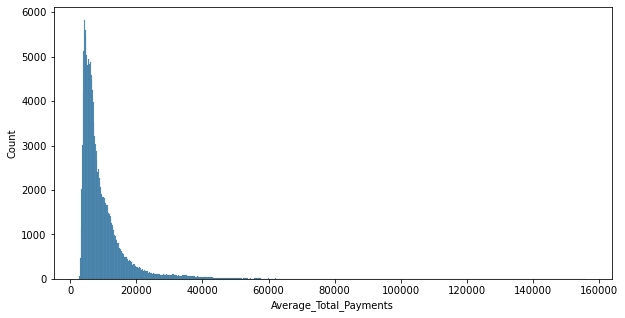

In [15]:
plt.figure(figsize=(10,5)) # Plot a graph with reasonable size.
sns.histplot(data['Average_Total_Payments'])
plt.show()

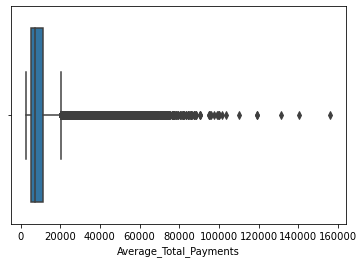

In [99]:
sns.boxplot(x = 'Average_Total_Payments', data = data)
plt.show()

- We can observe from those 2 plots that approximately 75% of the charges are under $10,000, yet the maximum charge is 156,158.

## Section 2.2: Count by State

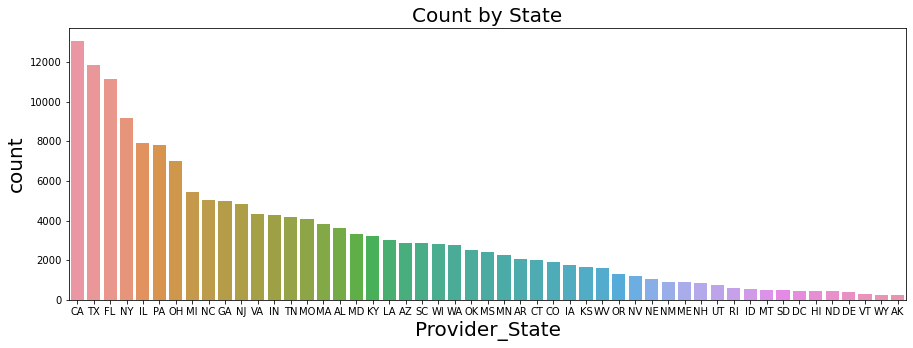

In [106]:
# data['Provider_State'].value_counts()
plt.figure(figsize=(15,5))
sns.countplot(x='Provider_State',data=data,order=data['Provider_State'].value_counts().index)
plt.rcParams["axes.labelsize"] = 20
plt.title('Count by State',fontsize=20)
plt.show()

- The states with the most hospital divisions, according to this histogram, are California, Texas, and Florida.
- From this chart, we can also see which states have better medical facilities and higher population densities, resulting in differences in the number of cases

## Section 2.3: Count of top 20 cities

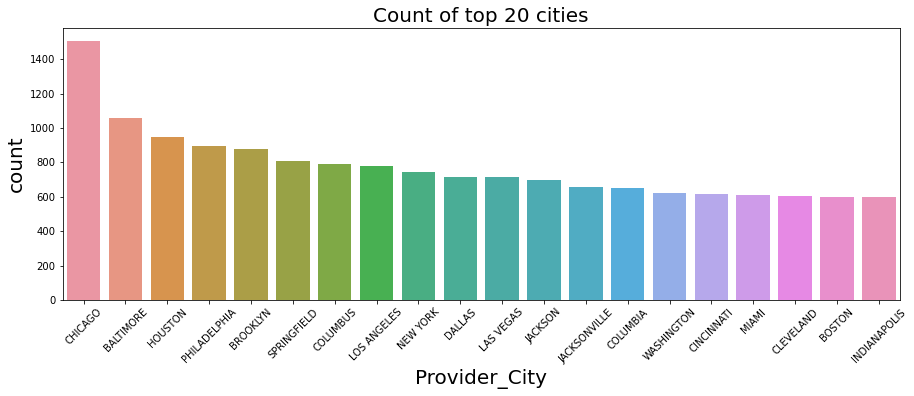

In [107]:
plt.figure(figsize=(15,5))
txt = data['Provider_City'].value_counts()[:20].index

chart = sns.countplot(
    x='Provider_City' ,data=data , order=txt
)

_ = chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.rcParams["axes.labelsize"] = 10
plt.title('Count of top 20 cities',fontsize=20)
plt.show()

- From this histogram, chicago, baltmore and houston has the highest number of hospital divisions.

## Section 2.4: Largest 5 DRG Difference in Total Payments

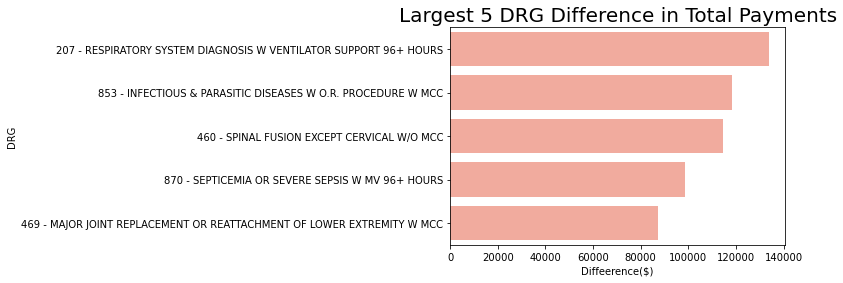

In [101]:
maxmin = data.groupby('DRG')['Average_Total_Payments'].agg(['max','min']).reset_index()
maxmin['Difference'] = maxmin[('max')] - maxmin[('min')]
maxmin.sort_values(by='Difference',ascending=False,inplace=True)
maxmin.DRG = maxmin.DRG.astype('str')
diff5 = maxmin.head(5)

sns.barplot(x = 'Difference', y = 'DRG',data = diff5, color = 'tomato',alpha=0.6)
plt.title('Largest 5 DRG Difference in Total Payments',fontsize=20)
plt.xlabel("Diffeerence($)")
plt.show()

- The five drg with the largest average payment differences are shown in the bar chart above, very surprising data, the average payment for the same DRG can vary by so much
- We should focus on these DRG's with outsized payment gaps, there is a high probability of abuse of resources in these DRG.

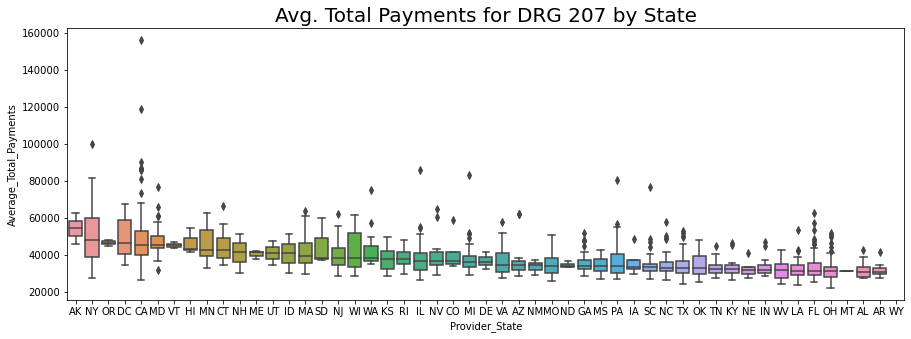

In [78]:
# Subset data with DRG of code207 by State(order by median)
df_207 = data[data["DRG"] == "207 - RESPIRATORY SYSTEM DIAGNOSIS W VENTILATOR SUPPORT 96+ HOURS"]
gp = df_207[['Provider_State'
             ,'Average_Total_Payments']].groupby(by='Provider_State')\
             .median().sort_values(by='Average_Total_Payments',ascending=False).index
gp = gp.astype('str')
plt.figure(figsize=(15,5))
sns.boxplot(x="Provider_State", 
            y="Average_Total_Payments",
            order = gp,
            data=df_207)
plt.title('Avg. Total Payments for DRG 207 by State',fontsize=20)
plt.show()

- I chose DRG with code 207, which has the largest gap, and the box plot shows that California has a very specific outlier compared to other states

## Section 2.5: Largest 5 Average Total Payments Difference by State

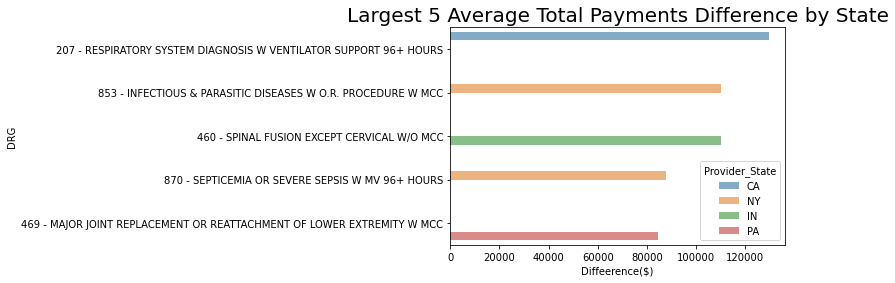

In [102]:
maxmin = data.groupby(['DRG','Provider_State'])['Average_Total_Payments'].agg(['max','min']).reset_index()
maxmin['Difference'] = maxmin[('max')] - maxmin[('min')]
maxmin.sort_values(by='Difference',ascending=False,inplace=True)
maxmin['Provider_State'] = maxmin['Provider_State'].astype('str')
maxmin['DRG'] = maxmin['DRG'].astype('str')
diff5 = maxmin.head(5)

sns.barplot(x = 'Difference', y = 'DRG',hue = 'Provider_State',data = diff5,alpha=0.6)
plt.title('Largest 5 Average Total Payments Difference by State',fontsize=20)
plt.xlabel("Diffeerence($)")
plt.show()

- In addition to the focus on DRG, this bar chart shows the states with the largest payment differences, California has the largest difference in DRG within code 207, New York has two DRGs that both show large differences, and then Indiana and Pennsylvania also need attention.
- While the differences in health care systems between states can be significant, payment disparities of this magnitude should be taken seriously and explored more deeply

## Section 2.6: Top5 Highest Bills Treatments

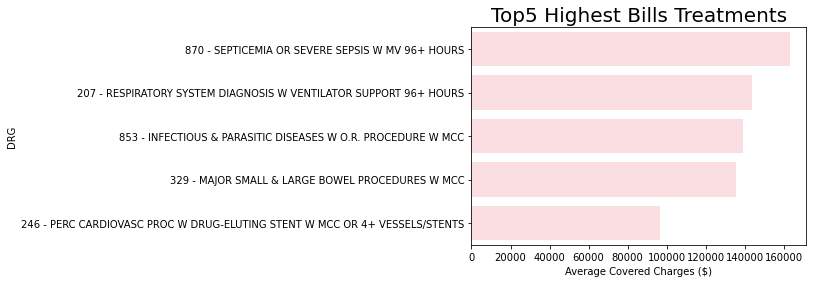

In [103]:
mean = data.groupby('DRG')['Average_Covered_Charges'].agg(['max','min','mean']).reset_index()
mean.sort_values(by='mean',ascending=False,inplace=True)
mean.DRG = mean.DRG.astype('str')
diff5 = mean.head(5)

sns.barplot(x = 'mean', y = 'DRG',data = diff5, color = 'pink',alpha=0.6)
plt.title('Top5 Highest Bills Treatments',fontsize=20)
plt.xlabel("Average Covered Charges ($)")
plt.show()

- This bar chart shows the five DRGs corresponding to the highest average covered charges. We also need to be aware of whether these DRGs are matched by Medicare Payments. Since these are the 5 highest DRGs of covered charges, avoiding abuse and fraud will be even more important to avoid property Loss.

# Section 3: Feature Engineering

## Section 3.1:  Ratio of average Total PMT  by State & DRG 

In [308]:
bm_avg_payment_st_drg = data.groupby(['Provider_State','DRG'])['Average_Total_Payments'].mean().reset_index()
bm_avg_payment_st_drg.columns = ['Provider_State','DRG','Avg_Payment_ByStateDRG']
bm_avg_payment_st_drg.head()

,Provider_State,DRG,Avg_Payment_ByStateDRG
0,AK,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,8401.950000
1,AK,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,8799.000000
2,AK,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,21608.010000
3,AK,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,12555.548333
4,AK,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,9275.867500


In [329]:
# add the new feature average spending to the dataset 
df1= pd.merge(data, bm_avg_payment_st_drg, how='left', on=['Provider_State', 'DRG'])
df1['Avg_Payment_ByStateDRG_ratio'] = np.where(df1['Avg_Payment_ByStateDRG']==0,0, 
                                               df1['Average_Total_Payments'] / df1['Avg_Payment_ByStateDRG'])
df1.head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Covered_Charges,Average_Total_Payments,Average_Medicare_Payments,Average_Patients_Payments,Avg_Payment_ByStateDRG,Avg_Payment_ByStateDRG_ratio
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73,1013.51,5743.611739,1.005855
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71,810.86,5743.611739,1.007653
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79,981.16,5743.611739,0.946260
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16,1288.40,5743.611739,0.943232
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44,806.89,5743.611739,0.985152


In [313]:
# cut by percentile for plotting
var = 'Avg_Payment_ByStateDRG_ratio'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df1[binned_var] = pd.qcut( df1[var],percentile)

[Text(0, 0, '(0.384, 0.694]'),
 Text(1, 0, '(0.694, 0.785]'),
 Text(2, 0, '(0.785, 0.864]'),
 Text(3, 0, '(0.864, 0.957]'),
 Text(4, 0, '(0.957, 1.102]'),
 Text(5, 0, '(1.102, 1.383]'),
 Text(6, 0, '(1.383, 1.663]'),
 Text(7, 0, '(1.663, 7.858]')]

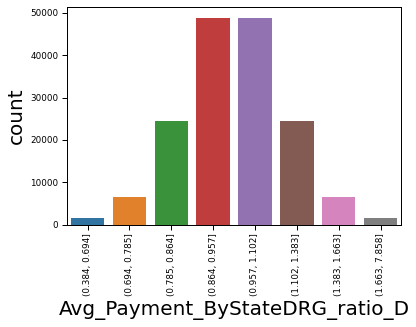

In [314]:
plt.figure(figsize=(6,4))
g = sns.countplot(x=binned_var, data=df1)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [315]:
df1[df1[var]>1.663].describe()

,Provider_Zipcode,Total_Discharges,Average_Covered_Charges,Average_Total_Payments,Average_Medicare_Payments,Average_Patients_Payments,Avg_Payment_ByStateDRG,Avg_Payment_ByStateDRG_ratio
count,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000,1627.000000
mean,47876.758451,36.334972,65037.922876,20907.369693,17848.583417,3058.786275,10896.762940,1.907423
std,30141.952013,36.306848,77310.116572,17158.855043,16100.709956,5510.070843,8408.970150,0.373960
min,1655.000000,11.000000,4202.180000,5886.030000,1400.570000,108.840000,3346.484211,1.663087
25%,20785.000000,16.000000,24503.080000,11012.660000,8889.000000,797.580000,6061.648894,1.712811
50%,40962.000000,25.000000,40721.710000,15279.000000,13205.310000,1112.530000,8228.249512,1.796364
75%,77030.000000,43.000000,75474.120000,23483.875000,20565.675000,2880.510000,12404.591921,1.971717
max,98195.000000,483.000000,929118.900000,156158.180000,154620.810000,75998.660000,56465.890641,7.857934


From the histogram can see the proportion of percentile binning in 99% of the proportion of rising anomalies, I chose 1.663 as the threshold value to get 1627 data counted as anomalies

## Section 3.2: Ratio of median Total PMT  by State & DRG 

In [326]:
bm_med_payment_st_drg = data.groupby(['Provider_State','DRG'])['Average_Total_Payments'].median().reset_index()
bm_med_payment_st_drg.columns = ['Provider_State','DRG','Med_Payment_ByStateDRG']
bm_med_payment_st_drg.describe()

,Med_Payment_ByStateDRG
count,5025.000000
mean,10245.003566
std,7833.510767
min,3130.820000
25%,5380.710000
50%,7447.180000
75%,12010.045000
max,68006.425000


In [348]:
df2= pd.merge(data, bm_med_payment_st_drg, how='left', on=['Provider_State', 'DRG'])
df2['Med_Payment_ByStateDRG_ratio'] = np.where(df2['Med_Payment_ByStateDRG']==0,0, 
                                               df2['Average_Total_Payments'] / df2['Med_Payment_ByStateDRG'])
df2.head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Covered_Charges,Average_Total_Payments,Average_Medicare_Payments,Average_Patients_Payments,Med_Payment_ByStateDRG,Med_Payment_ByStateDRG_ratio
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73,1013.51,5658.33,1.021015
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71,810.86,5658.33,1.022841
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79,981.16,5658.33,0.960522
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16,1288.40,5658.33,0.957449
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44,806.89,5658.33,1.000000


In [319]:
# cut by percentile for plotting
var = 'Med_Payment_ByStateDRG_ratio'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df2[binned_var] = pd.qcut(df2[var],percentile)

[Text(0, 0, '(0.517, 0.75]'),
 Text(1, 0, '(0.75, 0.83]'),
 Text(2, 0, '(0.83, 0.908]'),
 Text(3, 0, '(0.908, 1.0]'),
 Text(4, 0, '(1.0, 1.153]'),
 Text(5, 0, '(1.153, 1.466]'),
 Text(6, 0, '(1.466, 1.79]'),
 Text(7, 0, '(1.79, 9.339]')]

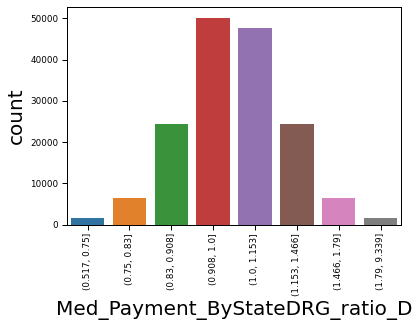

In [320]:
plt.figure(figsize=(6,4))
g = sns.countplot(x=binned_var, data=df2)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [322]:
df2[df2[var]>1.79].describe()

,Provider_Zipcode,Total_Discharges,Average_Covered_Charges,Average_Total_Payments,Average_Medicare_Payments,Average_Patients_Payments,Med_Payment_ByStateDRG,Med_Payment_ByStateDRG_ratio
count,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000,1632.000000
mean,43477.333333,35.892157,62096.875815,20730.069608,17793.856771,2936.212837,9990.500705,2.064849
std,30195.661138,37.025080,75123.223325,16745.333445,15673.784680,5459.924199,7535.888624,0.454947
min,1655.000000,11.000000,4202.180000,5886.030000,1400.570000,108.840000,3235.710000,1.790004
25%,19119.750000,16.000000,22556.835000,11109.747500,9054.957500,776.925000,5623.400000,1.852284
50%,33136.000000,25.000000,38538.925000,15440.695000,13281.515000,1029.330000,7576.925000,1.939462
75%,75187.250000,42.000000,72621.895000,23417.552500,20675.490000,2600.670000,11387.932500,2.118154
max,98195.000000,483.000000,929118.900000,156158.180000,154620.810000,75998.660000,55198.170000,9.338775


Similar to the first feature, this time the median is replaced and the anomalous result also appears in the last bar, so I chose a threshold of 1.79 to get 1632 anomalous values

## Section 3.3:   Ratio of average Total PMT by City & DRG 

In [332]:
avg_payment_ct_drg = data.groupby(['Provider_City','DRG'])['Average_Total_Payments'].mean().reset_index()
avg_payment_ct_drg.columns = ['Provider_City','DRG','Avg_Payment_ByCityDRG']
avg_payment_ct_drg.describe()

,Avg_Payment_ByCityDRG
count,105823.000000
mean,9446.948753
std,7331.672396
min,2673.000000
25%,5147.845000
50%,7039.452500
75%,11022.100000
max,156158.180000


In [349]:
df3= pd.merge(data, avg_payment_ct_drg, how='left', on=['Provider_City', 'DRG'])
df3['avg_payment_ct_drg_ratio'] = np.where(df3['Avg_Payment_ByCityDRG']==0,0, 
                                               df3['Average_Total_Payments'] / df3['Avg_Payment_ByCityDRG'])
df3.head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Covered_Charges,Average_Total_Payments,Average_Medicare_Payments,Average_Patients_Payments,Avg_Payment_ByCityDRG,avg_payment_ct_drg_ratio
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73,1013.51,5566.760000,1.037810
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71,810.86,5787.570000,1.000000
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79,981.16,6221.850000,0.873526
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16,1288.40,5919.483333,0.915208
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44,806.89,5658.330000,1.000000


In [339]:
# cut by percentile for plotting
var = 'avg_payment_ct_drg_ratio'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df3[binned_var] = pd.qcut(df3[var],percentile)

[Text(0, 0, '(0.237, 0.727]'),
 Text(1, 0, '(0.727, 0.828]'),
 Text(2, 0, '(0.828, 0.956]'),
 Text(3, 0, '(0.956, 1.0]'),
 Text(4, 0, '(1.0, 1.02]'),
 Text(5, 0, '(1.02, 1.186]'),
 Text(6, 0, '(1.186, 1.381]'),
 Text(7, 0, '(1.381, 3.753]')]

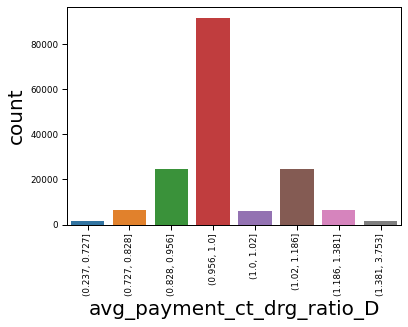

In [340]:
plt.figure(figsize=(6,4))
g = sns.countplot(x=binned_var, data=df3)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [341]:
df3[df3[var]>1.381].describe()

,Provider_Zipcode,Total_Discharges,Average_Covered_Charges,Average_Total_Payments,Average_Medicare_Payments,Average_Patients_Payments,Avg_Payment_ByCityDRG,avg_payment_ct_drg_ratio
count,1626.000000,1626.000000,1626.000000,1626.000000,1626.000000,1626.000000,1626.000000,1626.000000
mean,47593.527060,42.570111,52554.346882,17628.013739,15174.262435,2453.751304,11643.921687,1.502020
std,28070.663732,39.623354,56675.597983,14292.277140,13049.321739,4289.886737,9112.699306,0.158610
min,1655.000000,11.000000,5635.710000,5101.660000,1400.570000,108.840000,3545.874000,1.381075
25%,21287.000000,19.000000,21691.430000,9289.145000,7626.467500,784.525000,6313.425341,1.414020
50%,40536.000000,30.000000,33924.995000,12955.155000,11061.780000,1049.105000,8651.979364,1.458728
75%,75235.000000,52.000000,60521.720000,19957.182500,17477.665000,2271.425000,13149.551384,1.528052
max,99645.000000,453.000000,613926.600000,131187.350000,130466.570000,74168.030000,77332.980000,3.753099


Even within states, there are differences in health care systems, facilities, and structures between cities, so this time I broke it down to cities. The distribution of the histogram has changed significantly compared to the previous one, with a more concentrated distribution of centers. The anomalous variation still appears in 99% of the percentile, and I chose a threshold of 1.381 to get 1626 anomalies

## Section 3.4: Ratio of median Total PMT by City & DRG 

In [343]:
med_payment_ct_drg = data.groupby(['Provider_City','DRG'])['Average_Total_Payments'].median().reset_index()
med_payment_ct_drg.columns = ['Provider_City','DRG','Med_Payment_ByCityDRG']
med_payment_ct_drg.describe()

,Med_Payment_ByCityDRG
count,105823.000000
mean,9415.799000
std,7309.696367
min,2673.000000
25%,5125.775000
50%,7014.710000
75%,10988.395000
max,156158.180000


In [350]:
df4= pd.merge(data, med_payment_ct_drg, how='left', on=['Provider_City', 'DRG'])
df4['med_payment_ct_drg_ratio'] = np.where(df4['Med_Payment_ByCityDRG']==0,0, 
                                               df4['Average_Total_Payments'] / df4['Med_Payment_ByCityDRG'])
df4.head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Covered_Charges,Average_Total_Payments,Average_Medicare_Payments,Average_Patients_Payments,Med_Payment_ByCityDRG,med_payment_ct_drg_ratio
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73,1013.51,5566.760,1.037810
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71,810.86,5787.570,1.000000
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79,981.16,6416.270,0.847058
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16,1288.40,5563.935,0.973692
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44,806.89,5658.330,1.000000


In [345]:
# cut by percentile for plotting
var = 'med_payment_ct_drg_ratio'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df4[binned_var] = pd.qcut(df4[var],percentile)

[Text(0, 0, '(0.237, 0.735]'),
 Text(1, 0, '(0.735, 0.853]'),
 Text(2, 0, '(0.853, 0.982]'),
 Text(3, 0, '(0.982, 1.0]'),
 Text(4, 0, '(1.0, 1.019]'),
 Text(5, 0, '(1.019, 1.212]'),
 Text(6, 0, '(1.212, 1.499]'),
 Text(7, 0, '(1.499, 5.592]')]

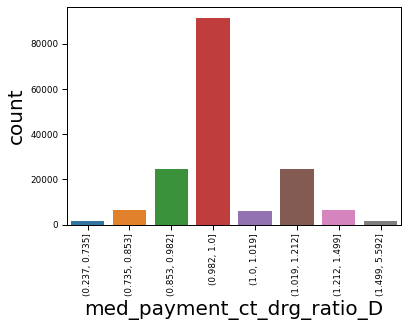

In [346]:
plt.figure(figsize=(6,4))
g = sns.countplot(x=binned_var, data=df4)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [347]:
df4[df4[var]>1.499].describe()

,Provider_Zipcode,Total_Discharges,Average_Covered_Charges,Average_Total_Payments,Average_Medicare_Payments,Average_Patients_Payments,Med_Payment_ByCityDRG,med_payment_ct_drg_ratio
count,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000,1634.000000
mean,48297.697674,43.079559,51714.596787,17070.708849,14715.094015,2355.614835,10108.950967,1.674424
std,27870.854045,40.882186,55212.542844,14075.136959,12889.553370,4140.120555,7994.895536,0.254388
min,1199.000000,11.000000,5635.710000,5052.530000,1855.070000,108.840000,3114.580000,1.499189
25%,23298.000000,19.000000,21599.282500,8932.185000,7253.347500,789.257500,5481.362500,1.543069
50%,40536.000000,30.500000,34230.750000,12464.825000,10663.640000,1058.485000,7547.197500,1.603584
75%,75235.000000,53.000000,59328.972500,19311.352500,17003.332500,2264.070000,11551.886250,1.701102
max,98195.000000,622.000000,613926.600000,131187.350000,130466.570000,74168.030000,77332.980000,5.591943


The median and mean distributions are about the same, and I chose a threshold of 1.499 to get 1634 anomalies

## Section 3.5:   Ratio of average Total_Discharges by State & DRG 

In [370]:
avg_discharges_st_drg = data.groupby(['Provider_State','DRG'])['Total_Discharges'].mean().reset_index()
avg_discharges_st_drg.columns = ['Provider_State','DRG','Avg_Discharges_ByStateDRG']
avg_discharges_st_drg.describe()

,Avg_Discharges_ByStateDRG
count,5025.000000
mean,35.680817
std,27.611950
min,11.000000
25%,20.666667
50%,27.500000
75%,40.083333
max,497.000000


In [355]:
df5= pd.merge(data, avg_discharges_st_drg, how='left', on=['Provider_State', 'DRG'])
df5['avg_discharges_st_drg_ratio'] = np.where(df5['Avg_Discharges_ByStateDRG']==0,0, 
                                           df5['Total_Discharges'] / df5['Avg_Discharges_ByStateDRG'])
df5.head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Covered_Charges,Average_Total_Payments,Average_Medicare_Payments,Average_Patients_Payments,Avg_Discharges_ByStateDRG,avg_discharges_st_drg_ratio
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73,1013.51,38.217391,2.381115
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71,810.86,38.217391,0.366325
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79,981.16,38.217391,0.627986
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16,1288.40,38.217391,0.654152
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44,806.89,38.217391,0.470990


In [356]:
# cut by percentile for plotting
var = 'avg_discharges_st_drg_ratio'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df5[binned_var] = pd.qcut(df5[var],percentile)

[Text(0, 0, '(0.044, 0.19]'),
 Text(1, 0, '(0.19, 0.305]'),
 Text(2, 0, '(0.305, 0.5]'),
 Text(3, 0, '(0.5, 0.82]'),
 Text(4, 0, '(0.82, 1.388]'),
 Text(5, 0, '(1.388, 2.287]'),
 Text(6, 0, '(2.287, 3.472]'),
 Text(7, 0, '(3.472, 24.625]')]

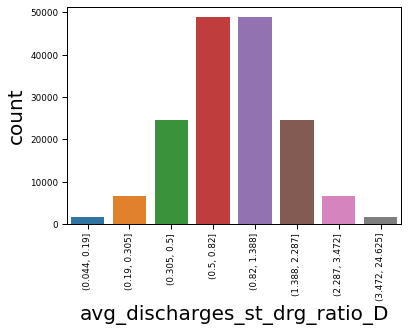

In [357]:
plt.figure(figsize=(6,4))
g = sns.countplot(x=binned_var, data=df5)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [358]:
df5[df5[var]>3.472].describe()

,Provider_Zipcode,Total_Discharges,Average_Covered_Charges,Average_Total_Payments,Average_Medicare_Payments,Average_Patients_Payments,Avg_Discharges_ByStateDRG,avg_discharges_st_drg_ratio
count,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000,1633.000000
mean,46212.914881,252.371096,39503.387348,10569.202474,9103.433325,1465.769149,56.101725,4.423824
std,26567.603771,207.135149,33426.930005,7944.958449,7287.436654,1831.052366,37.658417,1.224637
min,1605.000000,63.000000,2536.690000,3006.010000,1967.050000,318.440000,17.500000,3.472113
25%,27610.000000,136.000000,19915.590000,5742.900000,4604.480000,931.230000,32.120000,3.708045
50%,40202.000000,192.000000,28985.400000,8122.230000,6993.970000,1148.470000,44.668085,4.067270
75%,72211.000000,281.000000,46946.010000,12766.780000,11081.280000,1535.310000,63.650000,4.748789
max,99204.000000,3383.000000,374754.040000,87363.050000,84807.960000,65079.840000,244.311111,24.624593


This time I focus on total discharge, so we can know that for the same DRG some discharges will be very high in the case of likely medical abuse. From the distribution chart I can find the ratio from 3 times directly to 23 times, so I chose 3.472 as the threshold to get 1633 anomalies

## Section 3.6: Ratio of median Total_Discharges by State & DRG

In [371]:
med_discharges_st_drg = data.groupby(['Provider_State','DRG'])['Total_Discharges'].median().reset_index()
med_discharges_st_drg.columns = ['Provider_State','DRG','Med_Discharges_ByStateDRG']
med_discharges_st_drg.describe()

,Med_Discharges_ByStateDRG
count,5025.000000
mean,29.149353
std,22.842060
min,11.000000
25%,18.000000
50%,23.000000
75%,32.000000
max,529.000000


In [365]:
df6= pd.merge(data,med_discharges_st_drg, how='left', on=['Provider_State', 'DRG'])
df6['med_discharges_st_drg_ratio'] = np.where(df6['Med_Discharges_ByStateDRG']==0,0, 
                                           df6['Total_Discharges'] / df6['Med_Discharges_ByStateDRG'])
df6.head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Covered_Charges,Average_Total_Payments,Average_Medicare_Payments,Average_Patients_Payments,Med_Discharges_ByStateDRG,med_discharges_st_drg_ratio
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73,1013.51,29.0,3.137931
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71,810.86,29.0,0.482759
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79,981.16,29.0,0.827586
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16,1288.40,29.0,0.862069
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44,806.89,29.0,0.620690


In [366]:
# cut by percentile for plotting
var = 'med_discharges_st_drg_ratio'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df6[binned_var] = pd.qcut(df6[var],percentile)

[Text(0, 0, '(0.0462, 0.25]'),
 Text(1, 0, '(0.25, 0.394]'),
 Text(2, 0, '(0.394, 0.629]'),
 Text(3, 0, '(0.629, 1.0]'),
 Text(4, 0, '(1.0, 1.708]'),
 Text(5, 0, '(1.708, 2.967]'),
 Text(6, 0, '(2.967, 4.816]'),
 Text(7, 0, '(4.816, 71.409]')]

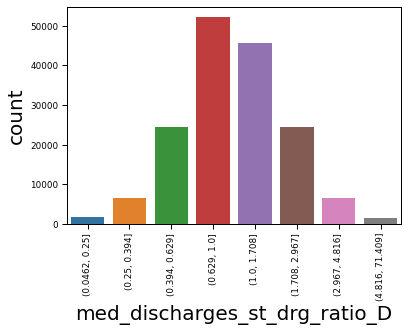

In [367]:
plt.figure(figsize=(6,4))
g = sns.countplot(x=binned_var, data=df6)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [368]:
df6[df6[var]>4.816].describe()

,Provider_Zipcode,Total_Discharges,Average_Covered_Charges,Average_Total_Payments,Average_Medicare_Payments,Average_Patients_Payments,Med_Discharges_ByStateDRG,med_discharges_st_drg_ratio
count,1631.000000,1631.000000,1631.000000,1631.000000,1631.000000,1631.000000,1631.000000,1631.000000
mean,45218.377682,264.871858,37569.466983,10611.905788,9117.650834,1494.254954,39.782342,6.641106
std,26076.064881,209.042776,29856.657599,7529.566348,6839.912623,1851.575037,23.933436,3.307332
min,1199.000000,65.000000,2536.690000,2728.690000,1752.350000,318.440000,12.000000,4.818182
25%,27401.000000,142.500000,19444.525000,5889.730000,4799.315000,927.650000,24.000000,5.206778
50%,40202.000000,200.000000,28398.560000,8415.830000,7211.830000,1155.730000,32.000000,5.860000
75%,71103.000000,300.500000,45400.665000,12905.870000,11304.545000,1602.200000,47.000000,7.037088
max,99204.000000,3383.000000,374754.040000,87363.050000,84807.960000,65079.840000,183.000000,71.409091


The median is not disturbed by outliers, so the 99% percentile distribution boost is even more surprising, I chose 4.816 as the threshold and got 1631 anomalies.

## Section 3.7: Ratio of average Covered_Charges by State & DRG

In [89]:
avg_covered_charge_st_drg = data.groupby(['Provider_State','DRG'])['Average_Covered_Charges'].mean().reset_index()
avg_covered_charge_st_drg.columns = ['Provider_State','DRG','Avg_CoveredCharge_ByStateDRG']
avg_covered_charge_st_drg.describe()

,Avg_CoveredCharge_ByStateDRG
count,5025.000000
mean,34950.866952
std,28839.099439
min,5624.207750
25%,16886.577500
50%,25015.496941
75%,42379.612083
max,277004.642419


In [90]:
df7= pd.merge(data, avg_covered_charge_st_drg, how='left', on=['Provider_State', 'DRG'])
df7['avg_covered_charge_st_drg_ratio'] = np.where(df7['Avg_CoveredCharge_ByStateDRG']==0,0, 
                                           df7['Average_Covered_Charges'] / df7['Avg_CoveredCharge_ByStateDRG'])
df7.head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Covered_Charges,Average_Total_Payments,Average_Medicare_Payments,Average_Patients_Payments,Ratio_Medicare_to_TotalPMT,Avg_CoveredCharge_ByStateDRG,avg_covered_charge_st_drg_ratio
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73,1013.51,0.824568,32044.436957,1.028667
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71,810.86,0.859896,32044.436957,0.472215
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79,981.16,0.819472,32044.436957,1.172134
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16,1288.40,0.762181,32044.436957,0.436840
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44,806.89,0.857398,32044.436957,0.987169


In [91]:
# cut by percentile for plotting
var = 'avg_covered_charge_st_drg_ratio'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df7[binned_var] = pd.qcut(df7[var],percentile)

[Text(0, 0, '(0.11, 0.362]'),
 Text(1, 0, '(0.362, 0.503]'),
 Text(2, 0, '(0.503, 0.704]'),
 Text(3, 0, '(0.704, 0.943]'),
 Text(4, 0, '(0.943, 1.254]'),
 Text(5, 0, '(1.254, 1.68]'),
 Text(6, 0, '(1.68, 2.211]'),
 Text(7, 0, '(2.211, 5.795]')]

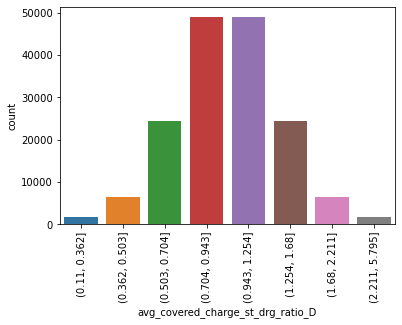

In [92]:
plt.figure(figsize=(6,4))
g = sns.countplot(x=binned_var, data=df7)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [93]:
df7[df7[var]>2.211].describe()

,Provider_Zipcode,Total_Discharges,Average_Covered_Charges,Average_Total_Payments,Average_Medicare_Payments,Average_Patients_Payments,Ratio_Medicare_to_TotalPMT,Avg_CoveredCharge_ByStateDRG,avg_covered_charge_st_drg_ratio
count,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000,1629.000000
mean,35448.060773,44.375691,99730.680645,13545.586992,12100.357710,1445.229282,0.860648,37406.478896,2.669746
std,27085.813855,48.033645,86799.909728,13894.227480,13374.365632,1740.318333,0.098875,31584.415544,0.469947
min,1655.000000,11.000000,19528.570000,2827.340000,1815.300000,186.840000,0.219133,6133.819143,2.211241
25%,19013.000000,17.000000,49426.880000,6238.710000,5108.860000,784.270000,0.817253,19320.251756,2.327680
50%,23847.000000,28.000000,75907.030000,9466.490000,8309.320000,979.960000,0.884404,27715.290811,2.505512
75%,46206.000000,53.000000,117246.420000,15077.040000,13802.420000,1413.880000,0.929980,42942.188750,2.859765
max,98122.000000,530.000000,929118.900000,156158.180000,154620.810000,21621.210000,0.994506,277004.642419,5.794716


The feature variable I chose was average Covered Charges this time, and I looked for anomalies by comparing the proportional size between the same states. The histogram shows that the proportional increase of anomalies appears in 99% percentile, and I chose the threshold 2.211 to get 1629 anomalies

## Section 3.8: Ratio of average Covered_Charges by City & DRG

In [82]:
med_covered_charge_ct_drg = data.groupby(['Provider_City','DRG'])['Average_Covered_Charges'].median().reset_index()
med_covered_charge_ct_drg.columns = ['Provider_City','DRG','Med_CoveredCharge_ByCityDRG']
med_covered_charge_ct_drg.describe()

,Med_CoveredCharge_ByCityDRG
count,105823.000000
mean,35432.738158
std,34293.124445
min,2459.400000
25%,15703.155000
50%,24634.000000
75%,42554.985000
max,929118.900000


In [84]:
df8= pd.merge(data, med_covered_charge_ct_drg, how='left', on=['Provider_City', 'DRG'])
df8['med_covered_charge_ct_drg_ratio'] = np.where(df8['Med_CoveredCharge_ByCityDRG']==0,0, 
                                           df8['Average_Covered_Charges'] / df8['Med_CoveredCharge_ByCityDRG'])
df8.head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Covered_Charges,Average_Total_Payments,Average_Medicare_Payments,Average_Patients_Payments,Ratio_Medicare_to_TotalPMT,Med_CoveredCharge_ByCityDRG,med_covered_charge_ct_drg_ratio
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73,1013.51,0.824568,36285.175,0.908445
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71,810.86,0.859896,15131.850,1.000000
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79,981.16,0.819472,37560.370,1.000000
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16,1288.40,0.762181,43592.420,0.321117
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44,806.89,0.857398,31633.270,1.000000


In [85]:
# cut by percentile for plotting
var = 'med_covered_charge_ct_drg_ratio'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df8[binned_var] = pd.qcut(df8[var],percentile)

[Text(0, 0, '(0.111, 0.467]'),
 Text(1, 0, '(0.467, 0.678]'),
 Text(2, 0, '(0.678, 0.955]'),
 Text(3, 0, '(0.955, 1.0]'),
 Text(4, 0, '(1.0, 1.045]'),
 Text(5, 0, '(1.045, 1.403]'),
 Text(6, 0, '(1.403, 2.006]'),
 Text(7, 0, '(2.006, 7.607]')]

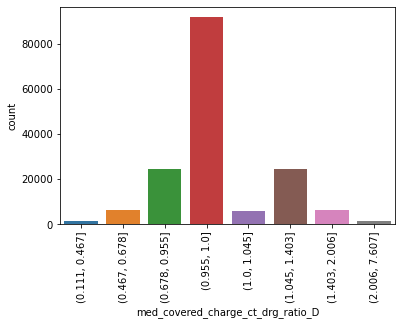

In [86]:
plt.figure(figsize=(6,4))
g = sns.countplot(x=binned_var, data=df8)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [87]:
df8[df8[var]>2.006].describe()

,Provider_Zipcode,Total_Discharges,Average_Covered_Charges,Average_Total_Payments,Average_Medicare_Payments,Average_Patients_Payments,Ratio_Medicare_to_TotalPMT,Med_CoveredCharge_ByCityDRG,med_covered_charge_ct_drg_ratio
count,1631.000000,1631.000000,1631.000000,1631.000000,1631.000000,1631.000000,1631.000000,1631.000000,1631.000000
mean,39814.649908,56.315144,76491.311288,12964.461343,11584.104862,1380.356481,0.861461,30616.468240,2.555748
std,29924.355890,66.104342,65983.061073,12168.891966,11605.991633,1594.412714,0.093985,26571.661744,0.633814
min,1655.000000,11.000000,11963.610000,2827.340000,1815.300000,277.910000,0.241590,5048.070000,2.006082
25%,15213.000000,20.000000,39104.180000,6219.535000,5136.685000,783.740000,0.813668,15561.720000,2.131164
50%,30342.000000,34.000000,56109.680000,9066.580000,7894.850000,967.790000,0.885324,21835.040000,2.329595
75%,68131.000000,68.000000,88741.605000,14661.135000,13127.900000,1379.205000,0.928531,35098.865000,2.721997
max,99204.000000,903.000000,613926.600000,99307.300000,95684.760000,29443.500000,0.989808,270734.525000,7.606864


Similarly, this time I switched to the city breakdown. The percentage of anomalies is more evident in the last distribution, where I chose a threshold of 2.006 to get 1631 anomalies

## Section 3.9:  Average Ratio_Medicare_to_TotalPMT by State & DRG 

In [515]:
avg_medicare_PMT_st_drg = data.groupby(['Provider_State','DRG'])['Ratio_Medicare_to_TotalPMT'].mean().reset_index()
avg_medicare_PMT_st_drg.columns = ['Provider_State','DRG','Avg_Medicare_PMT_ByStateDRG']
avg_medicare_PMT_st_drg.describe()

,Avg_Medicare_PMT_ByStateDRG
count,5025.000000
mean,0.844890
std,0.067357
min,0.316702
25%,0.797390
50%,0.851199
75%,0.898416
max,0.988215


In [511]:
df9= pd.merge(data, avg_medicare_PMT_st_drg, how='left', on=['Provider_State', 'DRG'])
df9['avg_medicare_PMT_st_drg_ratio'] = np.where(df9['Avg_Medicare_PMT_ByStateDRG']==0,0, 
                                           df9['Ratio_Medicare_to_TotalPMT'] / df9['Avg_Medicare_PMT_ByStateDRG'])
df9.head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Covered_Charges,Average_Total_Payments,Average_Medicare_Payments,Average_Patients_Payments,Ratio_Medicare_to_TotalPMT,Avg_Medicare_PMT_ByStateDRG,avg_medicare_PMT_st_drg_ratio
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73,1013.51,0.824568,0.801778,1.028425
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71,810.86,0.859896,0.801778,1.072487
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79,981.16,0.819472,0.801778,1.022069
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16,1288.40,0.762181,0.801778,0.950614
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44,806.89,0.857398,0.801778,1.069371


In [518]:
# cut by percentile for plotting
var = 'avg_medicare_PMT_st_drg_ratio'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df9[binned_var] = pd.qcut(df9[var],percentile)

[Text(0, 0, '(0.0567, 0.726]'),
 Text(1, 0, '(0.726, 0.861]'),
 Text(2, 0, '(0.861, 0.959]'),
 Text(3, 0, '(0.959, 1.013]'),
 Text(4, 0, '(1.013, 1.05]'),
 Text(5, 0, '(1.05, 1.095]'),
 Text(6, 0, '(1.095, 1.145]'),
 Text(7, 0, '(1.145, 1.382]')]

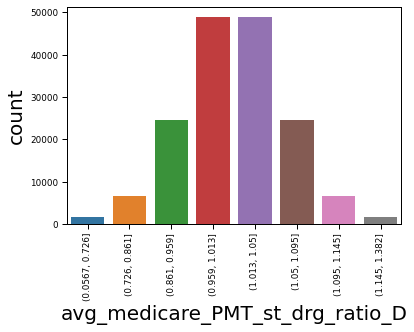

In [519]:
plt.figure(figsize=(6,4))
g = sns.countplot(x=binned_var, data=df9)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [521]:
df9[df9[var]>1.145].describe()

,Provider_Zipcode,Total_Discharges,Average_Covered_Charges,Average_Total_Payments,Average_Medicare_Payments,Average_Patients_Payments,Ratio_Medicare_to_TotalPMT,Avg_Medicare_PMT_ByStateDRG,avg_medicare_PMT_st_drg_ratio
count,1615.000000,1615.000000,1615.000000,1615.000000,1615.000000,1615.00000,1615.000000,1615.000000,1615.000000
mean,53537.613622,26.416099,27737.698365,8199.577226,7432.328316,767.24891,0.887903,0.756294,1.174770
std,25360.679859,29.818891,25444.788721,6109.954697,6006.920340,303.70368,0.046020,0.043227,0.031490
min,1440.000000,11.000000,2956.500000,2856.850000,2367.070000,159.43000,0.718472,0.598282,1.145002
25%,33021.000000,13.000000,13274.780000,5091.715000,4390.790000,611.63500,0.858310,0.726014,1.153363
50%,59806.000000,18.000000,18762.420000,6495.630000,5793.540000,751.11000,0.891659,0.762818,1.164613
75%,75246.000000,27.000000,31842.575000,8979.280000,8202.265000,899.20000,0.921415,0.786187,1.185415
max,99701.000000,453.000000,225729.140000,131187.350000,130466.570000,5788.58000,0.994506,0.851404,1.381868


I created a new ratio variable per cent of Covered Charges so that we can see how Covered Charges vary within states for the same condition and if the Covered Charges ratio is too high is there a potential for medical waste. So I chose 1.145 as the threshold from the histogram and got 1615 outliers

## Section 3.10:  Average Ratio_Medicare_to_TotalPMT by City & DRG 

In [569]:
avg_medicare_PMT_ct_drg = data.groupby(['Provider_City','DRG'])['Ratio_Medicare_to_TotalPMT'].mean().reset_index()
avg_medicare_PMT_ct_drg.columns = ['Provider_City','DRG','Avg_Medicare_PMT_ByCityDRG']
avg_medicare_PMT_ct_drg.describe()

,Avg_Medicare_PMT_ByCityDRG
count,105823.000000
mean,0.845084
std,0.084464
min,0.043155
25%,0.795571
50%,0.856713
75%,0.909640
max,1.000000


In [571]:
df10= pd.merge(data, avg_medicare_PMT_ct_drg, how='left', on=['Provider_City', 'DRG'])
df10['avg_medicare_PMT_ct_drg_ratio'] = np.where(df10['Avg_Medicare_PMT_ByCityDRG']==0,0, 
                                           df10['Ratio_Medicare_to_TotalPMT'] / df10['Avg_Medicare_PMT_ByCityDRG'])
df10.head()

,DRG,Provider_Id,Provider_Name,Provider_StreetAddress,Provider_City,Provider_State,Provider_Zipcode,Hospital_referral_region_desp,Total_Discharges,Average_Covered_Charges,Average_Total_Payments,Average_Medicare_Payments,Average_Patients_Payments,Ratio_Medicare_to_TotalPMT,Avg_Medicare_PMT_ByCityDRG,avg_medicare_PMT_ct_drg_ratio
0,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10001,SOUTHEAST ALABAMA MEDICAL CENTER,1108 ROSS CLARK CIRCLE,DOTHAN,AL,36301,AL - Dothan,91,32963.07,5777.24,4763.73,1013.51,0.824568,0.823783,1.000954
1,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10005,MARSHALL MEDICAL CENTER SOUTH,2505 U S HIGHWAY 431 NORTH,BOAZ,AL,35957,AL - Birmingham,14,15131.85,5787.57,4976.71,810.86,0.859896,0.859896,1.000000
2,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10006,ELIZA COFFEE MEMORIAL HOSPITAL,205 MARENGO STREET,FLORENCE,AL,35631,AL - Birmingham,24,37560.37,5434.95,4453.79,981.16,0.819472,0.806577,1.015987
3,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10011,ST VINCENT'S EAST,50 MEDICAL PARK EAST DRIVE,BIRMINGHAM,AL,35235,AL - Birmingham,25,13998.28,5417.56,4129.16,1288.40,0.762181,0.778686,0.978804
4,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,10016,SHELBY BAPTIST MEDICAL CENTER,1000 FIRST STREET NORTH,ALABASTER,AL,35007,AL - Birmingham,18,31633.27,5658.33,4851.44,806.89,0.857398,0.857398,1.000000


In [572]:
# cut by percentile for plotting
var = 'avg_medicare_PMT_ct_drg_ratio'
binned_var = var + '_D'
percentile = [0,0.01,0.05,0.2,0.5,0.8,0.95,0.99,1]
df10[binned_var] = pd.qcut(df10[var],percentile)

[Text(0, 0, '(0.213, 0.831]'),
 Text(1, 0, '(0.831, 0.929]'),
 Text(2, 0, '(0.929, 0.992]'),
 Text(3, 0, '(0.992, 1.0]'),
 Text(4, 0, '(1.0, 1.014]'),
 Text(5, 0, '(1.014, 1.069]'),
 Text(6, 0, '(1.069, 1.134]'),
 Text(7, 0, '(1.134, 1.786]')]

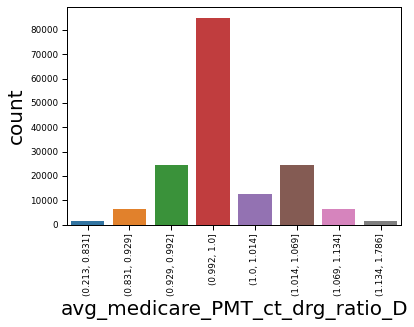

In [573]:
plt.figure(figsize=(6,4))
g = sns.countplot(x=binned_var, data=df10)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

In [574]:
df10[df10[var]>1.134].describe()

,Provider_Zipcode,Total_Discharges,Average_Covered_Charges,Average_Total_Payments,Average_Medicare_Payments,Average_Patients_Payments,Ratio_Medicare_to_TotalPMT,Avg_Medicare_PMT_ByCityDRG,avg_medicare_PMT_ct_drg_ratio
count,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000,1638.000000
mean,53437.010379,32.291209,35426.580855,9210.646569,8253.501685,957.144884,0.868824,0.734417,1.186195
std,27308.514314,30.389350,32382.077153,6600.207015,6465.356108,484.667096,0.066845,0.067382,0.064404
min,1069.000000,11.000000,4355.700000,2951.110000,1872.610000,102.910000,0.615482,0.473644,1.134047
25%,32331.250000,15.000000,15778.902500,5215.200000,4316.930000,721.920000,0.827221,0.690514,1.147063
50%,54453.000000,23.000000,24594.460000,6978.545000,6090.545000,864.190000,0.878518,0.744927,1.164772
75%,77048.000000,39.000000,42570.287500,10874.052500,9897.320000,1033.640000,0.920502,0.783612,1.203363
max,99519.000000,514.000000,289008.330000,64985.160000,64264.330000,6884.820000,0.991264,0.868991,1.785535


Similar to the 9th variable, but this time I break it down to between cities. The frequency distribution graph changes, with the distribution more concentrated between 0.99 and 1. I chose 1.134 as the threshold to get 1638 anomalies

# Section 3.11(Failure) average Total_Discharges by State & DRG

In [98]:
avg_discharges_ct_drg = data.groupby(['Provider_City','DRG'])['Total_Discharges'].mean().reset_index()
avg_discharges_ct_drg.columns = ['Provider_City','DRG','Avg_Discharges_ByCityDRG']
avg_discharges_ct_drg

,Provider_City,DRG,Avg_Discharges_ByCityDRG
0,ABBEVILLE,039 - EXTRACRANIAL PROCEDURES W/O CC/MCC,NaN
1,ABBEVILLE,057 - DEGENERATIVE NERVOUS SYSTEM DISORDERS W/...,NaN
2,ABBEVILLE,064 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,NaN
3,ABBEVILLE,065 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,NaN
4,ABBEVILLE,066 - INTRACRANIAL HEMORRHAGE OR CEREBRAL INFA...,NaN
...,...,...,...
197695,ZUNI,885 - PSYCHOSES,NaN
197696,ZUNI,897 - ALCOHOL/DRUG ABUSE OR DEPENDENCE W/O REH...,NaN
197697,ZUNI,917 - POISONING & TOXIC EFFECTS OF DRUGS W MCC,NaN
197698,ZUNI,918 - POISONING & TOXIC EFFECTS OF DRUGS W/O MCC,NaN


# Section 4: Conclusion

# Summary
- Based on the z-score of the feature variables, I counted outliers greater than 3. The percentage of outliers in the whole data set is very small, about 1.5% to 2.5%, so I think it is feasible to use both the mean and median as metrics.
- The abnormality appears in the distribution interval where the ratio lies in the 99% percentile and is manifested by a sudden and dramatic increase in the ratio.
- I can't guarantee that all 10 features are helpful in building predictive models, but I think the aggregation approach makes sense. Because there is a big difference in the level of care between each state, and a big difference in the cities within the state, the resulting benchmark will only be more relevant to the real situation when it is constantly subdivided.


# Insight
- When I did a city seegment of discharges, I found a lot of nanos, indicating that not all cities have a high enough level of care or facilities to address some of the diagnoses. So for those providers that lack sufficient medical capacity, if there is a sudden rise in DRG, a background and cause investigation is needed to prevent medical abuse.
- In Medical Fraud, the fraudulent behavior can also be determined by Percentage of reduplicative patients-pharmacy in a month, so if the frequency of patient visits can be taken into account, more feature engineering can be created for modeling.
- DRGs with large total payment differences and the highest coverd charge should be given special attention, with a high probability of medical abuse. Due to the high premiums attribute, reducing the abuse of such DRGs is better for property protection.

# Section 5: Reference

- Dataman/Kuo, C.(2022, February 22). Feature engineering for Healthcare Fraud Detection. Medium. Retrieved June 23, 2022, from https://medium.com/dataman-in-ai/2-features-for-healthcare-fraud-waste-and-abuse-7c262ac59859

- DataPower. (2020, August 31). Hospital_inpatient_datavisualization. Kaggle. Retrieved June 23, 2022, from https://www.kaggle.com/code/smiledana/hospital-inpatient-datavisualization 